<a href="https://colab.research.google.com/github/neko88/GoogleCollab/blob/main/Tensorflow_Intro_02_Load_%26_Pre_Process_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Load and Preprocess an Image Dataset
There are 3 ways:
1. Keras preprocessing utilities
2. Scratch input pipeline
3. Download a dataset from the Tensorflow Datasets

# 1) Setup

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# 2) Download the Flowers Dataset
There are 5 sub-directories of the flower dataset, one per class of flower:
```
flowers_photos/
daisy/
dandelion/
roses/
sunflowers/
tulips/
```



In [3]:
import pathlib

# Obtain the dataset URL
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Get the file from the dataset and save it into a var
archive = tf.keras.utils.get_file(origin=dataset_url , extract=True)

# Make a directory with the path
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [4]:
# Print the number of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


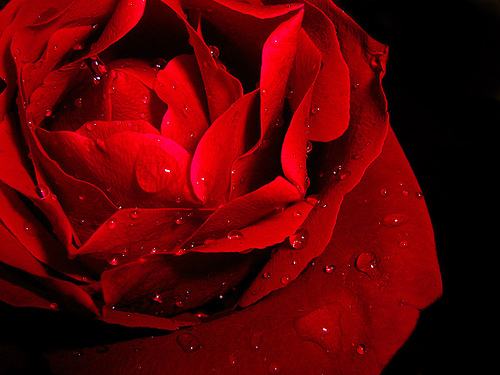

In [5]:
# Print some roses
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

# 3) Load Data using Keras Utility
Load the data off disk using kera's utility.


**Create a Dataset**

Use a validation split when developing a model. 
80% images should be for training while 20% for validation.

In [6]:
# Define parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Make the training data set from Kera Utility.

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,                               # Directory of the Data
    validation_split = 0.2,                 # Portion of the validation split
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
# Find the class names in the class_names attribute on the datasets

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# 4) Visualize the Data
Lets view the first 9 images from the training dataset.

In [ ]:
import matplotlib.pyplot as plt